# **Exploring Quality Attribute Scenarios based on a System Model Using AI**

## **Introduction**

This notebook demonstrates how to model and analyze a **Quality Attribute Scenario (QAS)** within a system using structured approaches. Quality Attribute Scenarios help capture non-functional requirements such as performance, reliability, and usability, ensuring the system meets its intended objectives under specific conditions.

By running this notebook, you will:

- Explore the elements of a Quality Attribute Scenario, including **stimulus**, **response**, and **measures**.
- See how system interactions and quality attributes are depicted through graphical representations.
- Understand how operational processes are tied to measurable quality outcomes.

---

## **What is a Quality Attribute Scenario?**

A Quality Attribute Scenario is a structured way to describe and analyze how a system responds to a specific stimulus. It typically consists of:

1. **Stimulus**: An event or action triggering a system response.
2. **Response**: The system's reaction to the stimulus.
3. **Measures**: Quantifiable properties used to evaluate the quality of the response (e.g., latency, accuracy, availability).




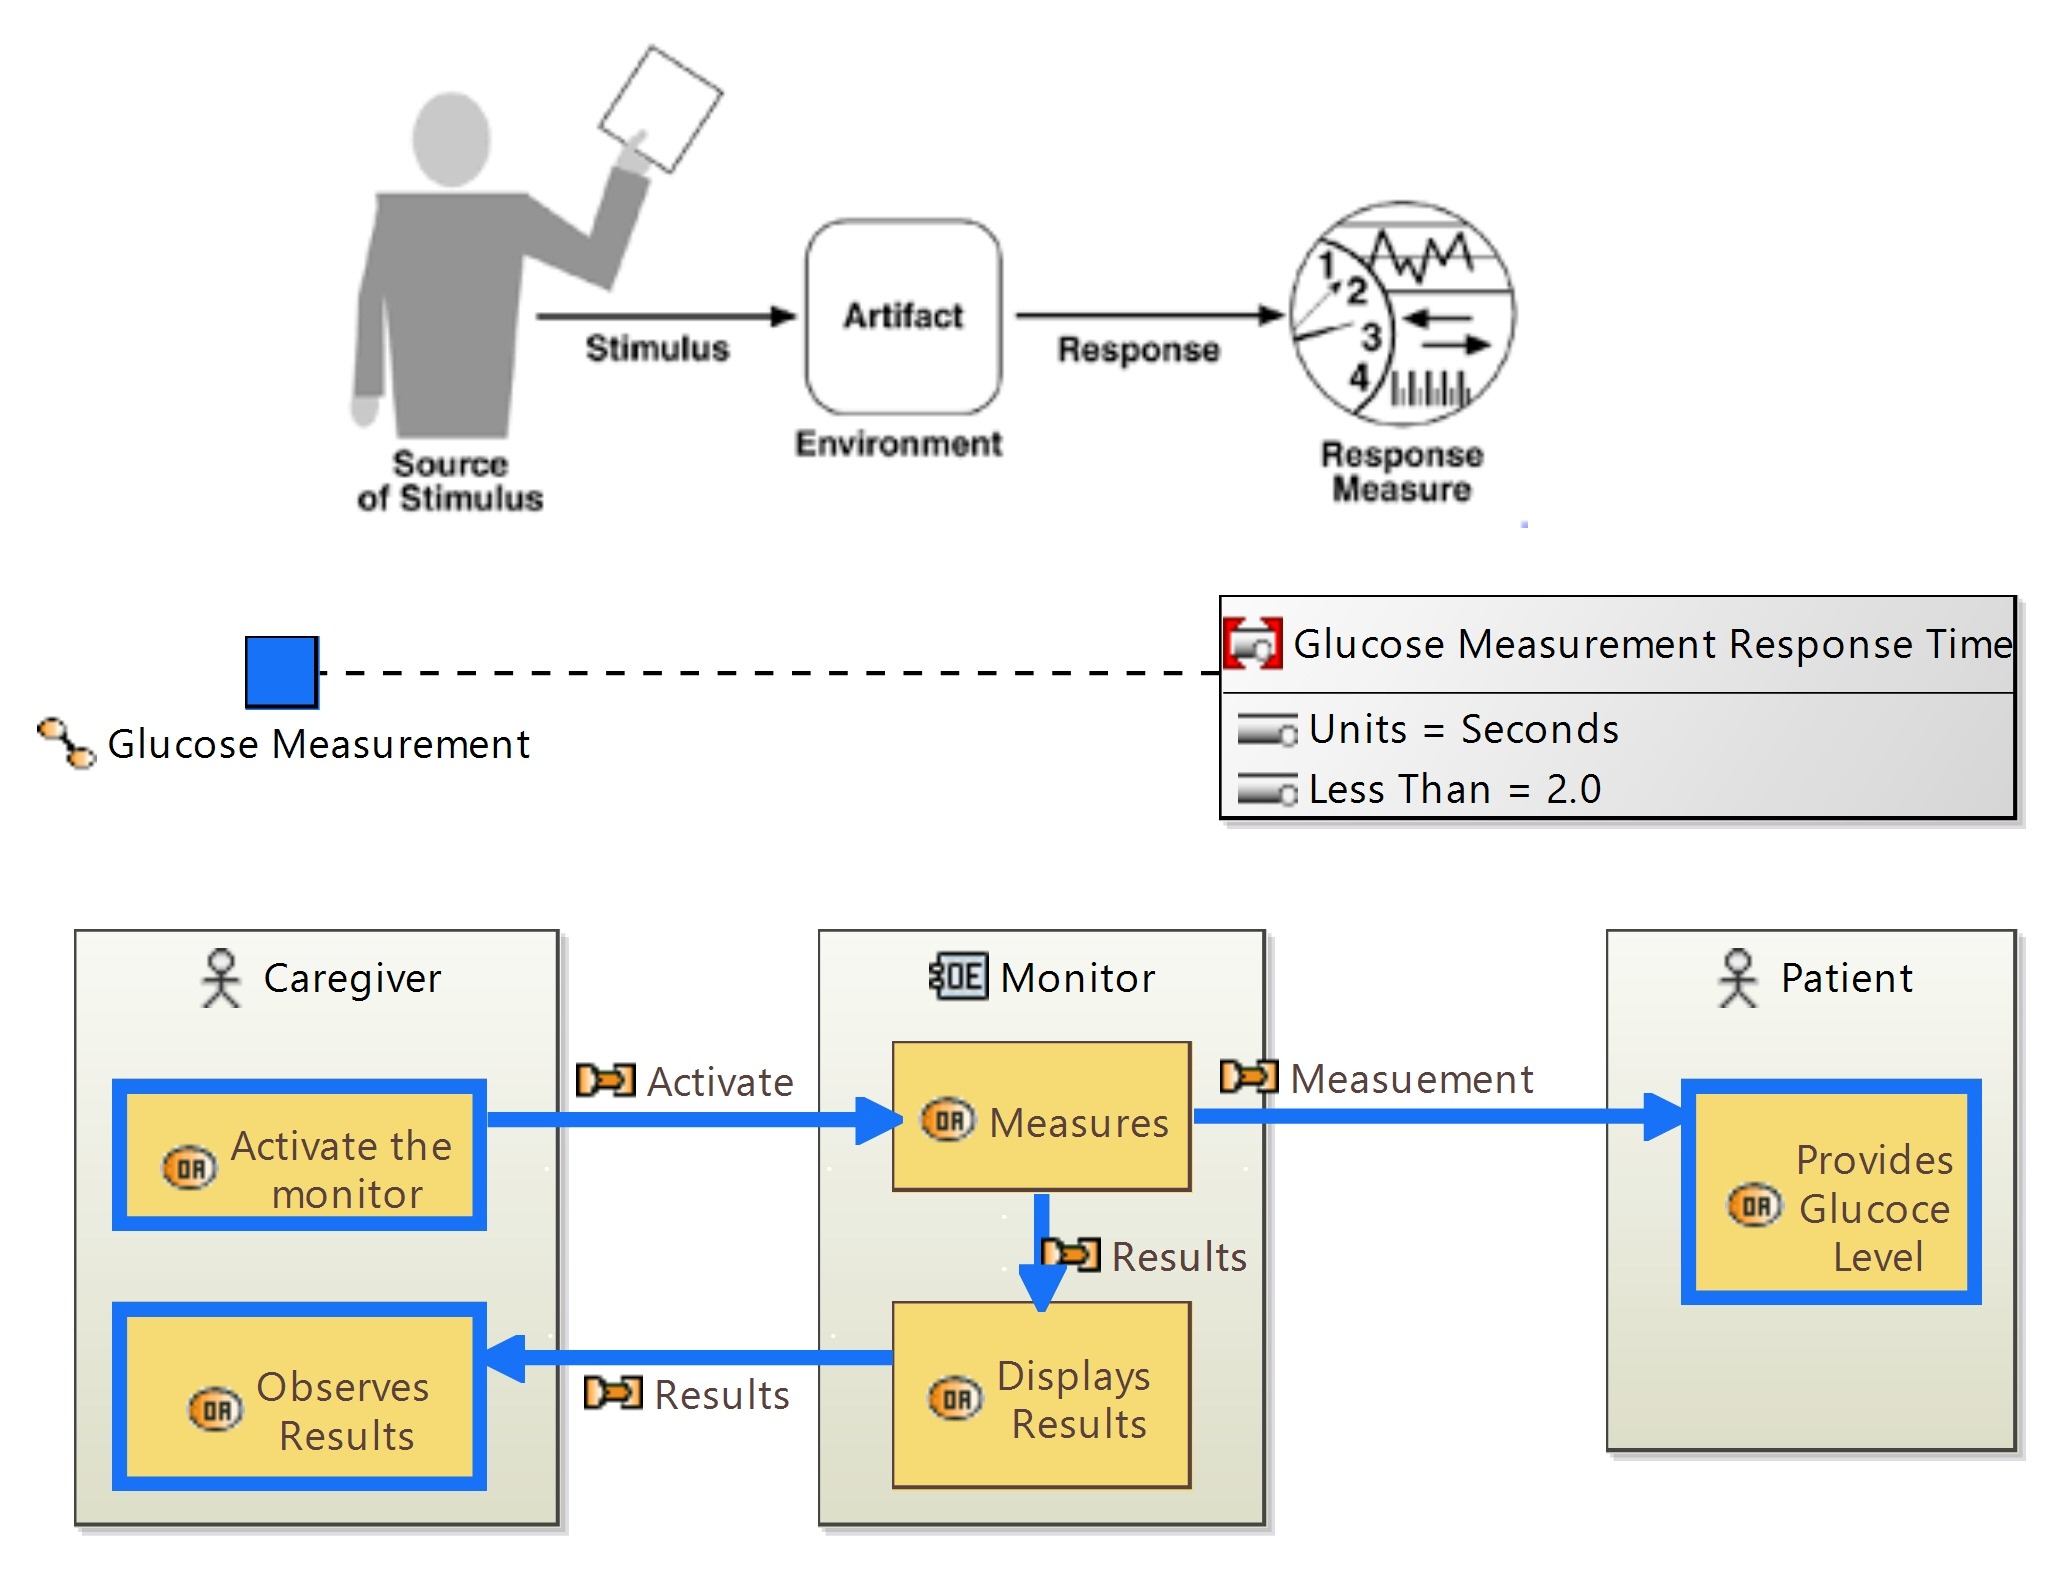

***Figure 1 :Glucose Measurement Quality Attribure Scenaro***

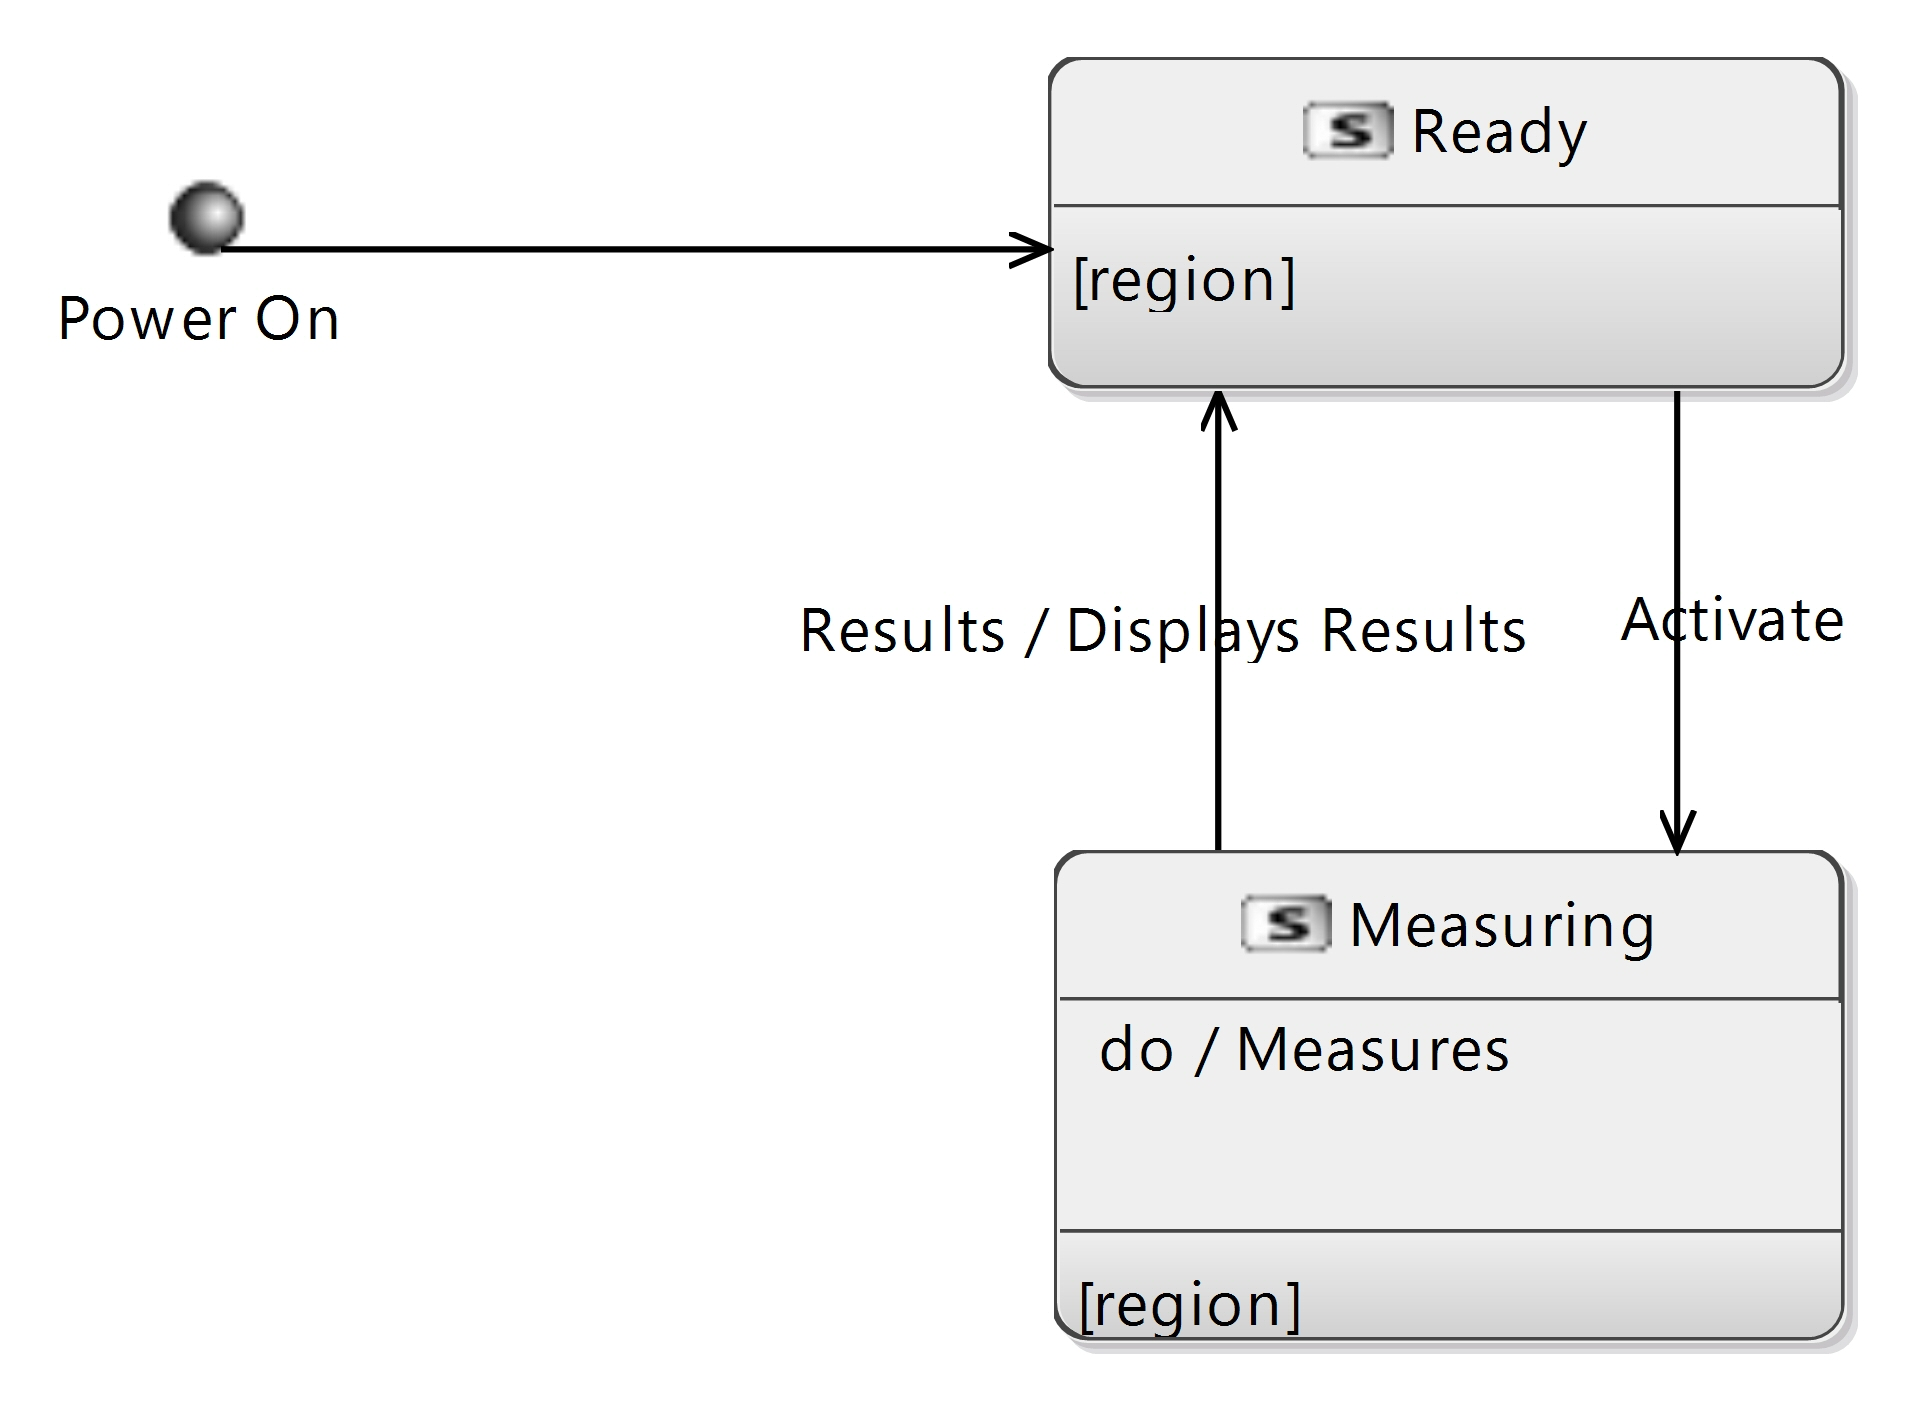

***Figure 2: Monitor State Machine***

In [1]:

import capellambse.decl

resources = {
    "Glucose-Monitor": "Glucose Monitor/Glucose Monitor",
}
path_to_model = "../Glucose Monitor.aird"
model = capellambse.MelodyModel(path_to_model, resources=resources)
import capellambse_helper
figure_counter =1

from IPython.display import  Markdown, Image
from IPython import display  as diag_display

diagram_file ="../Images/[OAB] Glucose Measurement Response.jpg"
display(diag_display.Image(filename=diagram_file, width=800) ) # Explicitly display the image
figure_caption = f"***Figure {figure_counter} :Glucose Measurement Quality Attribure Scenaro***"
display(Markdown(figure_caption))
figure_counter += 1

diagram_file ="../Images/[MSM] Monitor State Machine.jpg"
display(diag_display.Image(filename=diagram_file , width=500) ) # Explicitly display the image
figure_caption = f"***Figure {figure_counter}: Monitor State Machine***"
display(Markdown(figure_caption))
figure_counter += 1


# Architecture element is prepared for analysis 
Architecture is converted to a format recommended by ChatGPT. The format is YAML. YAML is also compatible with a tools to updated the model.

In [2]:
#Workflow
import capellambse_yaml_manager
yaml_handler = capellambse_yaml_manager.CapellaYAMLHandler()

# Generate YAML for the logical component and append to the file
fc = model.search("OperationalProcess").by_name("Glucose Measurement")
#fc = model.search("LogicalFunction").by_uuid("d19d2a85-59ae-41bb-a26e-d15a05c9a2b0")
#fc = model.search("LogicalComponent").by_uuid("8db95212-913f-440e-8143-e89375d03629")
#print(fc)
#print(fc.parts)
yaml_handler.generate_yaml(fc)

#yaml_handler.generate_yaml(model.search("LogicalComponent").by_name("Control SW"))

#yaml_handler.display()
yaml_handler.generate_yaml_referenced_objects()

# Display the content of the YAML file
#yaml_handler.display()

yaml_handler.write_output_file()

# Display the content of the YAML file
print("Structured Input is created for use with prompt") 


Structured Input is created for use with prompt


# Architecture is analyzed by ChatGPT with following prompt and structured input content.

In [3]:
prompt = """
Please analyze the stuctured input file and specifically provide insights on:
1. The purpose of the operational process.
2. A table with first column being the owning component, the second being a activity, last column being involved functional exchange, organized by involved functional exchanges.
3. List any property values and the related model element.
4. Write a description of the operational process in the format of a Quality Attribute Scenario.
5. Describe any state machines related to the system and the actors.
Please format the response in .html markup suitable for Juypter Notebook display operation.
"""
print(prompt)


Please analyze the stuctured input file and specifically provide insights on:
1. The purpose of the operational process.
2. A table with first column being the owning component, the second being a activity, last column being involved functional exchange, organized by involved functional exchanges.
3. List any property values and the related model element.
4. Write a description of the operational process in the format of a Quality Attribute Scenario.
5. Describe any state machines related to the system and the actors.
Please format the response in .html markup suitable for Juypter Notebook display operation.



In [4]:
import os

from IPython.core.display import HTML
from IPython.display import display, clear_output, Markdown
import Open_AI_RAG_manager


# Step 1:  Get YAML content
yaml_content = yaml_handler.get_yaml_content()

# Step 2: Invoke ChatGPT for analysis
analyzer = Open_AI_RAG_manager.ChatGPTAnalyzer(yaml_content)
analyzer.add_prompt(prompt)
chatgpt_response = analyzer.get_response()

# Step 3: Display the response in the notebook
#print("ChatGPT Analysis:\n")
display(Markdown(f"\n\n**ChatGPT Analysis:**\n"))
#print(chatgpt_response)
display(HTML(chatgpt_response))


OpenAI API Key retrieved successfully.




**ChatGPT Analysis:**


Owning Component,Activity,Involved Functional Exchange
Caregiver,Activate the monitor,Activate
Monitor,Measures,"Measuement, Results"
Monitor,Displays Results,Results
Patient,Provides Glucoce Level,Measuement


In [ ]:
Open_AI_RAG_manager.interactive_chat(analyzer)

Starting interactive chat...


In [ ]:
class Monitor:
    def __init__(self):
        self.state = "Power Off"

    def activate(self):
        print("Monitor activated.")
        self.state = "Ready"

    def measure(self):
        if self.state == "Ready":
            print("Measuring glucose level.")
            self.state = "Measuring"
            return "Measurement data"
        else:
            print("Monitor needs to be in Ready state to measure.")

    def display_results(self, results):
        if self.state == "Measuring":
            print(f"Displaying results: {results}")
            self.state = "Ready"
        else:
            print("Monitor needs to be in Measuring state to display results.")


class Caregiver:
    def __init__(self):
        self.monitor = Monitor()

    def activate_monitor(self):
        self.monitor.activate()

    def observe_results(self, results):
        print(f"Caregiver observes results: {results}")


class Patient:
    def __init__(self):
        self.glucose_level = 0

    def provide_glucose_level(self, measurement):
        print("Providing glucose level based on measurement.")
        return f"Glucose level derived from {measurement}"


def simulate_glucose_measurement():
    # Initialize entities
    caregiver = Caregiver()
    patient = Patient()

    # Scenario simulation
    caregiver.activate_monitor()  # Activate the monitor
    measurement = caregiver.monitor.measure()  # Measure glucose
    if measurement:
        glucose_level = patient.provide_glucose_level(measurement)  # Provide glucose level
        caregiver.monitor.display_results(glucose_level)  # Display results
        caregiver.observe_results(glucose_level)  # Caregiver observes the results


# Run the simulation
simulate_glucose_measurement()